In [1]:
import numpy as np
import pandas as pd

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# pandas 데이터 파악과 조작

**분석할 데이터를 수집(확보)하면 데이터의 특징을 파악하고 다루기 쉽게 변형하는 작업을 수행해야 한다**

# #1. 데이터 파악

데이터가 주어졌을때 가장 먼저 하는일은 데이터의 전반적인 구조를 파악하면서 데이터의 특징에 대한 감을 잡는다

- 데이터는 어떤 모양인가?
- 데이터의 크기?
- 어떤 변수들로 구성되었는가?
- 결측치가 있는가?

### 데이터를 파악하기 위해 사용하는 pandas 명령어

- **head()** : 데이터의 앞부분 출력
- **tail()** : 데이터의 뒷부분 출력
- **shape** : 데이터의 행,열 개수 출력
- **info()** : 변수 속성 출력
- **describe()** : 요약 통계량 출력

### 예제 데이터. 타이타닉 데이터

- data 출처: https://www.kaggle.com/hesh97/titanicdataset-traincsv/data


- 'data' 폴더 생성 후 'train.csv'를 'titanic.csv'로 변경하여 저장하기

In [3]:
titanic = pd.read_csv('data/titanic.csv')

### 데이터 앞/뒤 부분 확인하기 : head(), tail()

- **DataFrame.head(n=5)**
- **DafaFrame.tail(n=5)**

In [4]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
titanic.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 데이터 크기 확인 : shape

- **데이터프레임의 행,열 수를 튜플로 반환**

In [8]:
titanic.shape

(891, 12)

In [9]:
# 데이터 총수 : size
titanic.size

10692

### 변수 속성 파악하기 :  info()

- **index의 dtype과 개수, columns의 개수**
- **column별 non-null values의 개수, dtype**
- **memory 사용크기**

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 요약 통계량 구하기 : describe()

- **형식**: describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)


- **NaN을 제외한 데이터에 대한 데이터의 중심경향(central tendency),산포(dispersion),모양(shape)을 대표하는 기술통계량 계산 출력**
    - 중심 : 평균(mean), 중위수(median), 백분위수(percentile), 최소값(min), 최대값(max)
    - 산포 : 표준편차(std)
    - 빈도 : 개수(count), 최빈값(top), freq, unique

In [12]:
# 참고.
s = pd.Series([np.datetime64("2001-01-01"),
              np.datetime64("2010-01-01"),
              np.datetime64("2010-01-01")])
s.describe(datetime_is_numeric=True)

count                      3
mean     2007-01-01 08:00:00
min      2001-01-01 00:00:00
25%      2005-07-02 12:00:00
50%      2010-01-01 00:00:00
75%      2010-01-01 00:00:00
max      2010-01-01 00:00:00
dtype: object

In [15]:
s = pd.Series([np.datetime64("2001-01-01"),
              np.datetime64("2010-01-01"),
              np.datetime64("2010-01-01")])
s.describe()

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html?highlight=describe#pandas.DataFrame.describe

C:\Users\yuth9\AppData\Local\Temp\ipykernel_5908\3291443980.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  s.describe()


count                       3
unique                      2
top       2010-01-01 00:00:00
freq                        2
first     2001-01-01 00:00:00
last      2010-01-01 00:00:00
dtype: object

In [11]:
# 수치형 컬럼만 요약통계량
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# percentiles 인수를 리스트로 지정하여 백분위수 계산
titanic.describe(percentiles=[0.2,0.4,0.6,0.8])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
20%,179.000000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
40%,357.000000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,535.000000,0.000000,3.000000,31.800000,0.000000,0.000000,21.679200
80%,713.000000,1.000000,3.000000,41.000000,1.000000,1.000000,39.687500
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### describe(include='all') : 문자 변수 요약 통계량 함께 출력

- unique : 중복을 제거한 범주의 개수
- top : 최빈값
- freq : 최빈값 빈도

In [18]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [20]:
titanic.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [21]:
titanic.describe(include='int64')

,PassengerId,Survived,Pclass,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594
std,257.353842,0.486592,0.836071,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000


In [22]:
titanic.describe(include='float64')

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [23]:
titanic.describe(include=['int64', 'float64'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
titanic.describe(exclude='int64')

,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
count,891,891,714.000000,891,891.000000,204,889
unique,891,2,NaN,681,NaN,147,3
top,"Braund, Mr. Owen Harris",male,NaN,347082,NaN,B96 B98,S
freq,1,577,NaN,7,NaN,4,644
mean,NaN,NaN,29.699118,NaN,32.204208,NaN,NaN
std,NaN,NaN,14.526497,NaN,49.693429,NaN,NaN
min,NaN,NaN,0.420000,NaN,0.000000,NaN,NaN
25%,NaN,NaN,20.125000,NaN,7.910400,NaN,NaN
50%,NaN,NaN,28.000000,NaN,14.454200,NaN,NaN
75%,NaN,NaN,38.000000,NaN,31.000000,NaN,NaN


---------------------------------------------

> ## 탐색적 데이터 분석(EDA)

- Exploratory Data Analysis
- 데이터 특성을 파악하고 상세화
- 데이터 유형(속성)에 따라 데이터의 특성을 파악한 후 분석 방향 결정

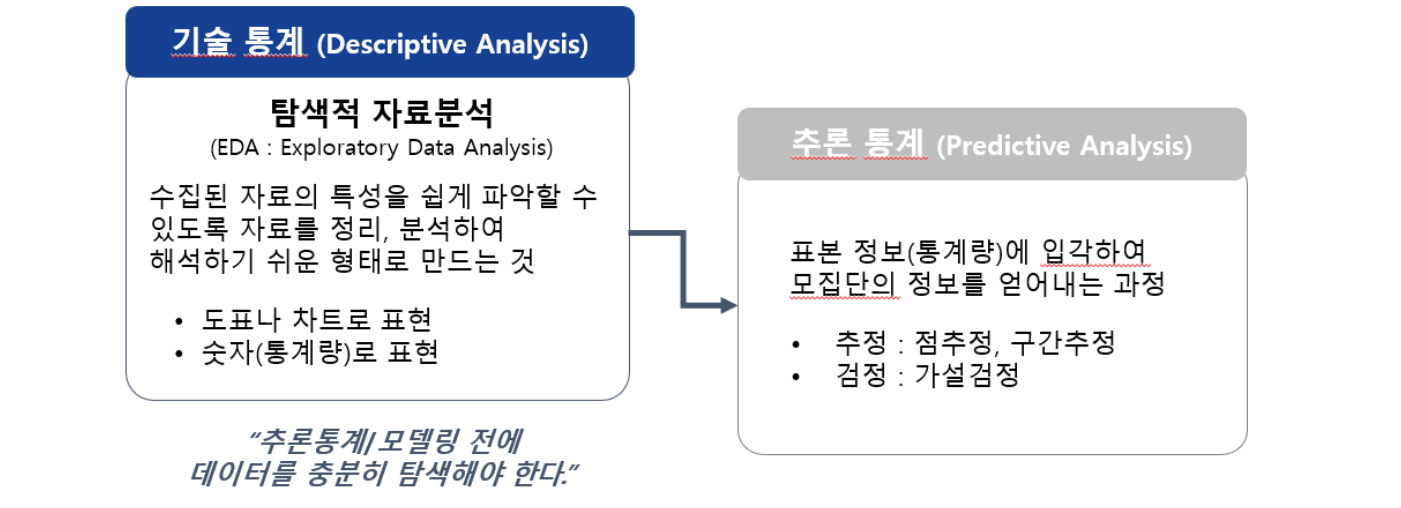

### 데이터 유형(범주형/수치형)에 따른 EDA 기법

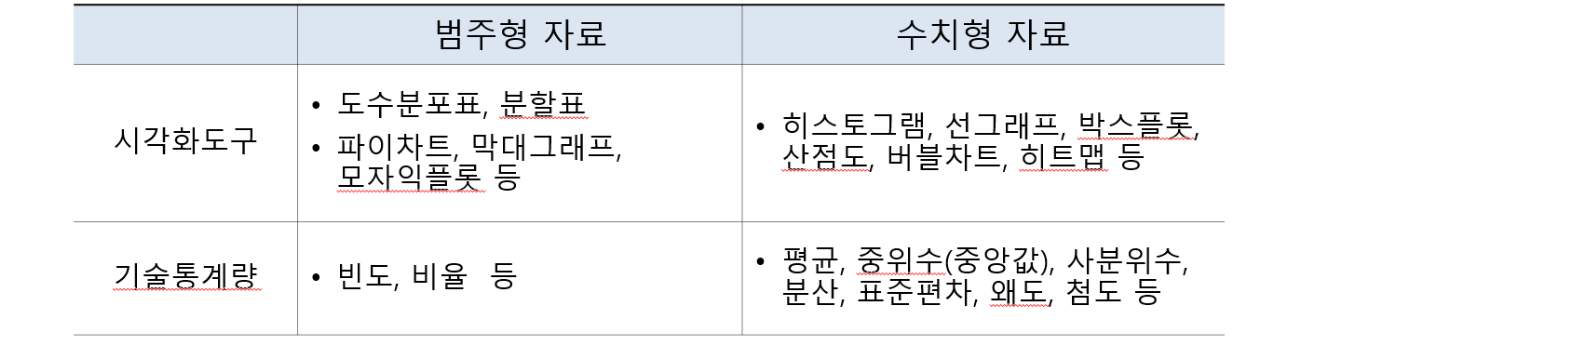

### 기술통계량(Descriptive Statistic)

**: 데이터의 특징을 수치로 요약, 기술하는 통계량**

- **위치통계량(measure of location)**
    - 데이터의 중심경향(central tendency)을 나타내는 척도
    - 대표값이라고도 부름
    - 수치형자료 : 평균(산술/조화/기하), 중위수, 절사평균, 사분위수 등
    - 범주형자료 : 최빈수
    
    
- **변이통계량(measure of location)**
    - 데이터의 퍼짐, 흩어진 정도(산포:dispersion)를 나타내는 척도
    - 산포도라고도 부름
    - 수치형자료 : 분산, 표준편차, 사분위간범위, 범위 등
    - 범주형자료 : 범주별 빈도
    
    
- **모양통계량(measure of shape)**
    - 왜도(skewness) : 데이터가 중심 위치로부터 어느 한쪽으로 치우친(비대칭) 정도를 타나태는 척도
    - 첨도(kurtosis) : 분포의 뽀족함 정도

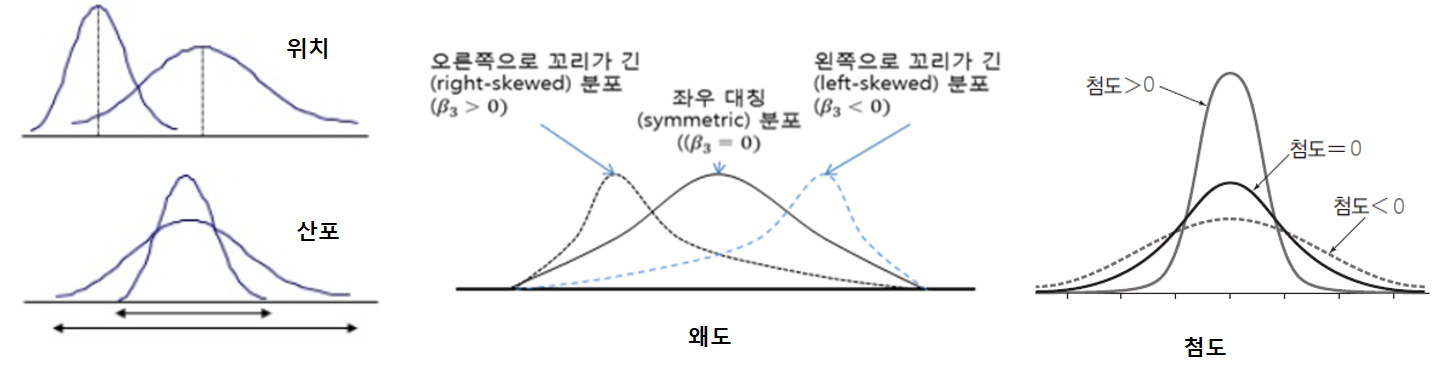

#### 기술통계량 관련 API 함수들

https://numpy.org/doc/stable/reference/routines.statistics.html

https://pandas.pydata.org/docs/reference/series.html

https://pandas.pydata.org/docs/reference/frame.html

https://docs.scipy.org/doc/scipy/reference/stats.html


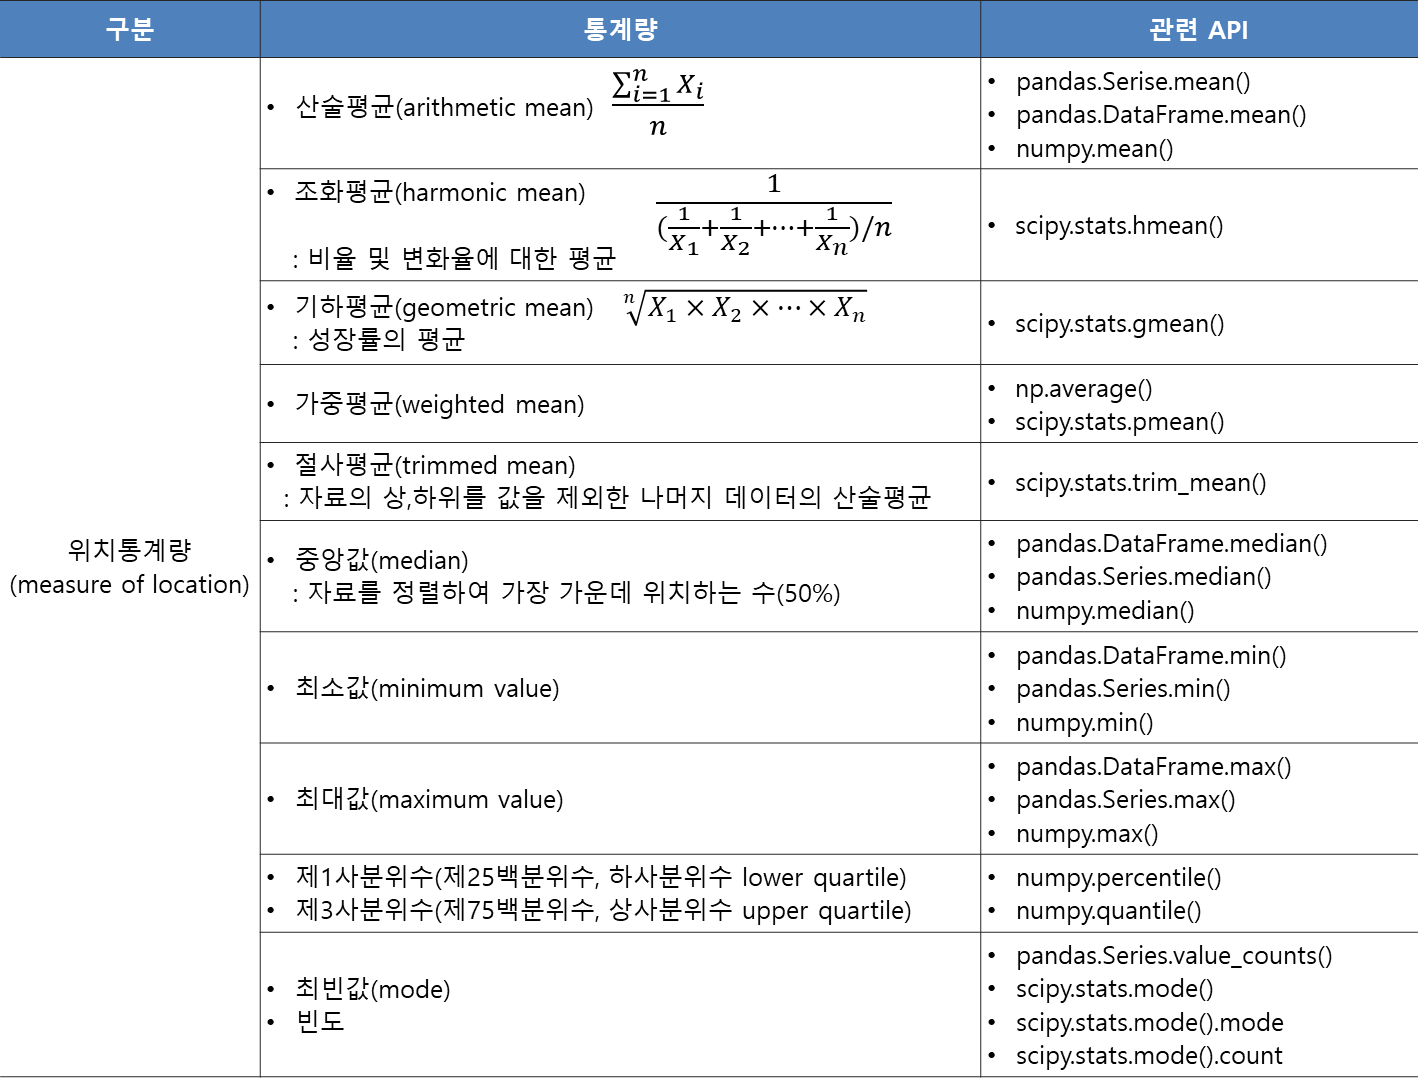

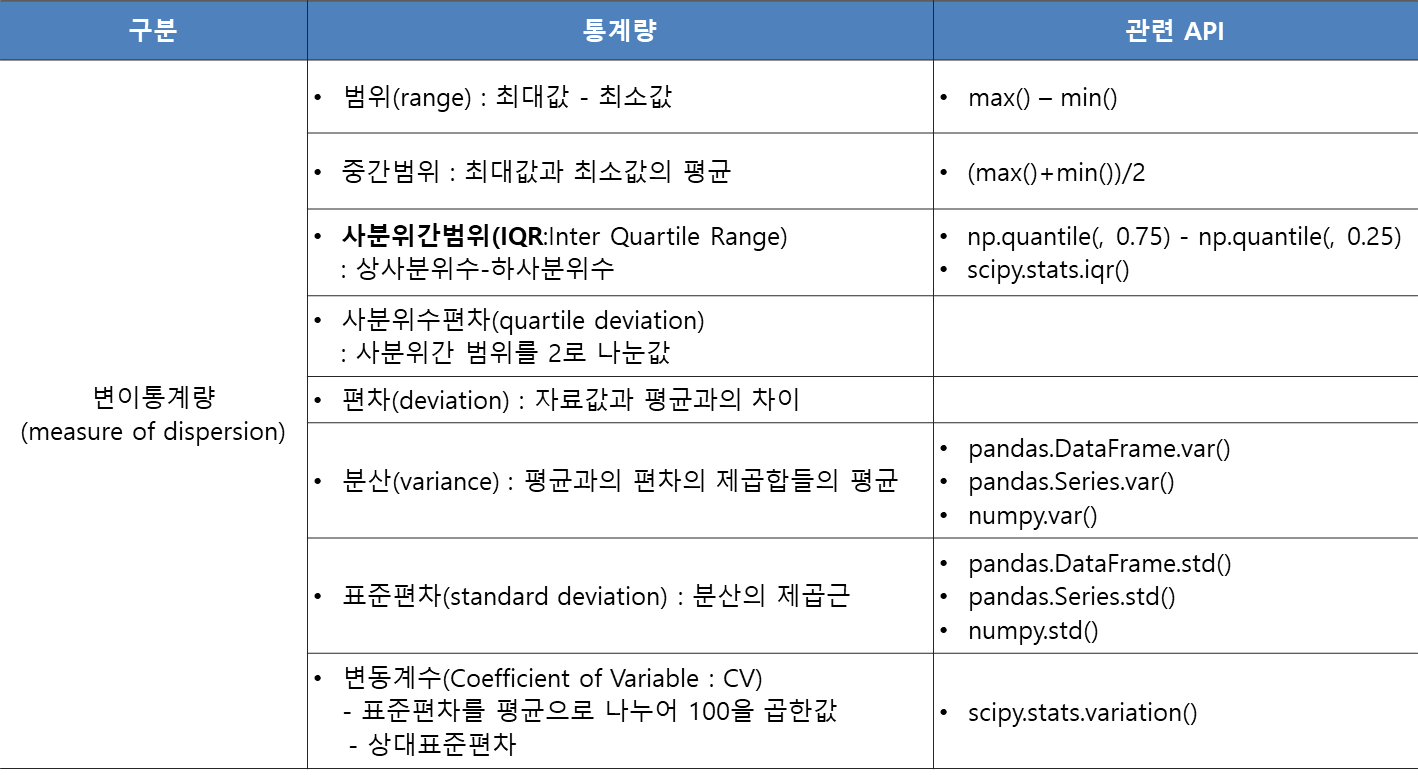

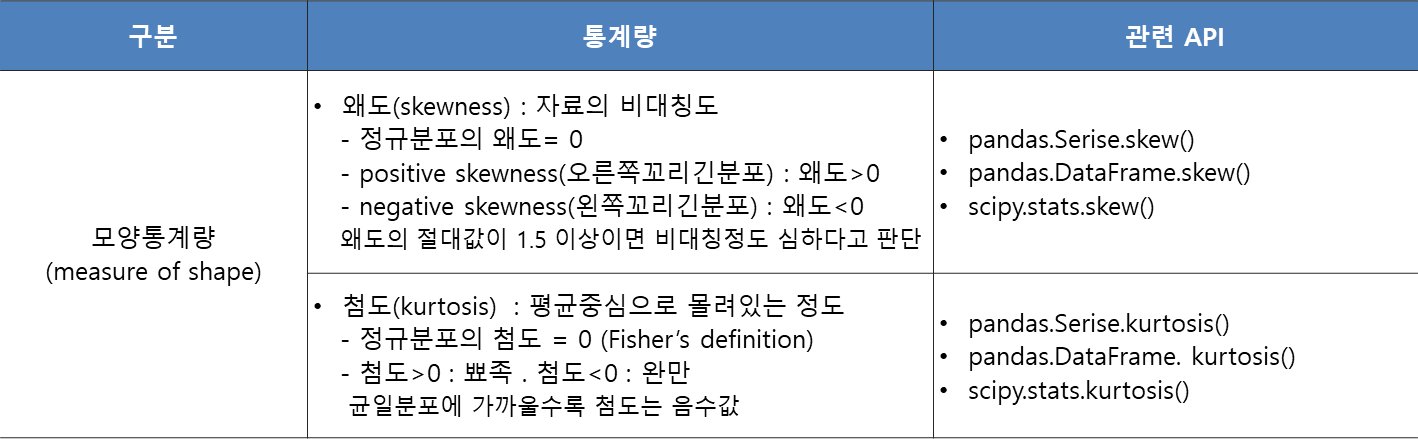

### 시각화 도구를 통한 데이터 파악

**: 데이터의 변수 수, 종류(유형), 분석 목적에 따라 시각화 도구가 달라짐**

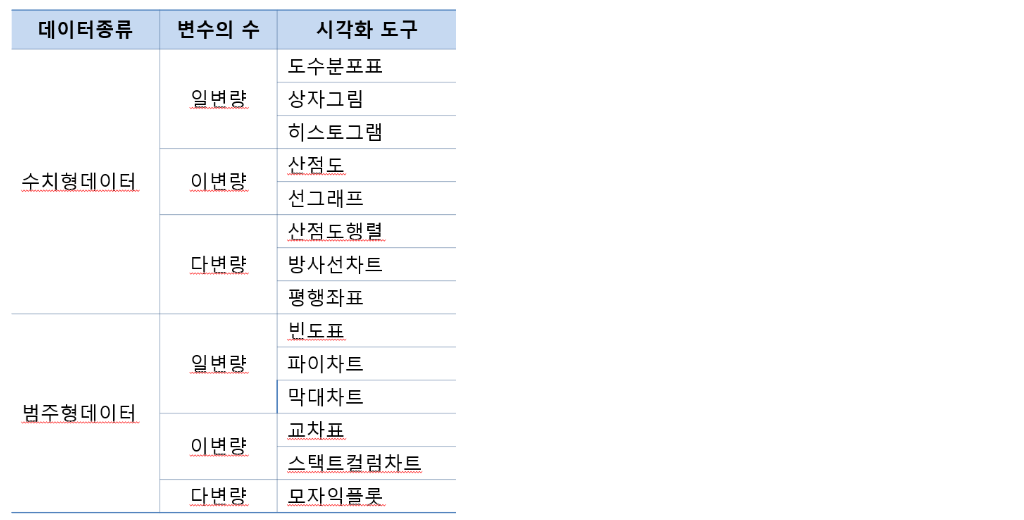

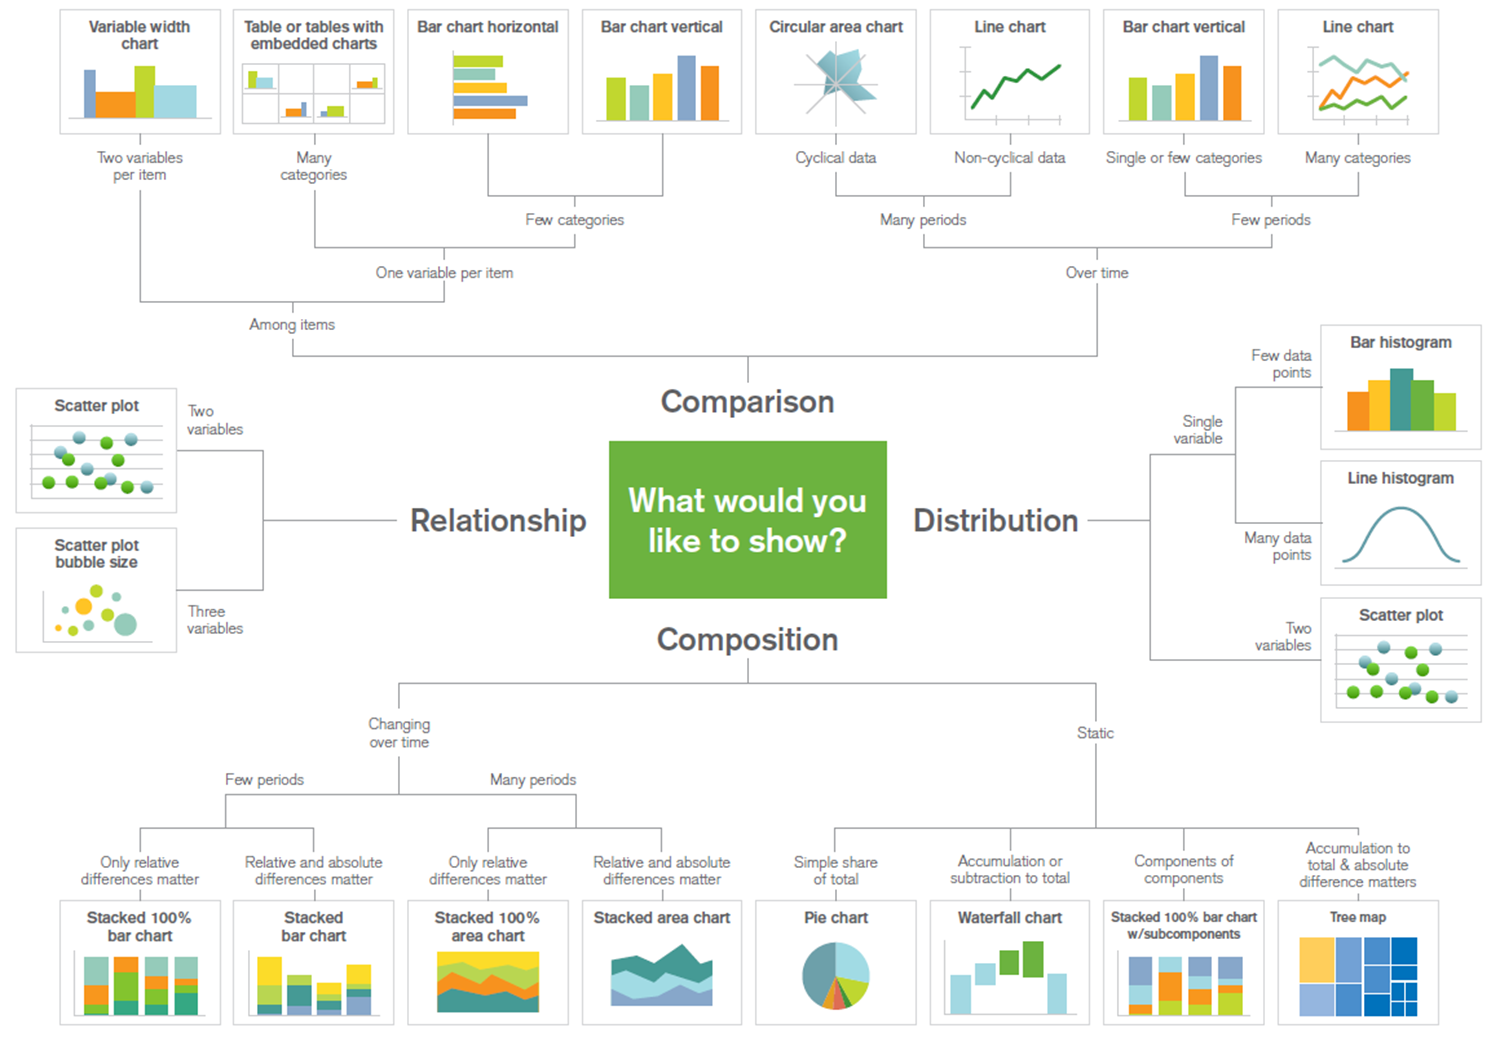

출처: https://blog.qlik.com/third-pillar-of-mapping-data-to-visualizations-usage

#### pandas의 plot 함수

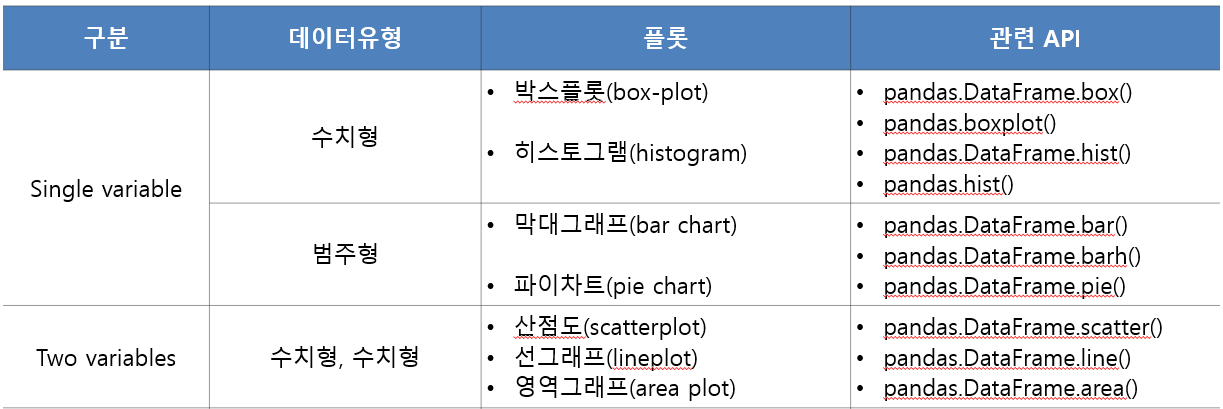

----------------------------------